# Installed PyTorch

### Git cloned Ultralytics Yolo Version 5

In [6]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\fh\anaconda3\lib\site-packages\torch\hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\fh/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\fh\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun comm

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Make Detections

In [21]:
img = "https://i.gyazo.com/f90ce1bda9c02c212a0495bde3dff79f.jpg"

In [22]:
results = model(img)
results.print()

image 1/1: 792x1327 9 persons, 31 cars, 1 motorcycle, 1 truck
Speed: 982.4ms pre-process, 81.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


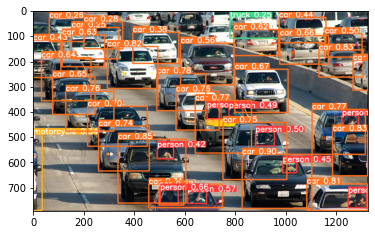

In [23]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

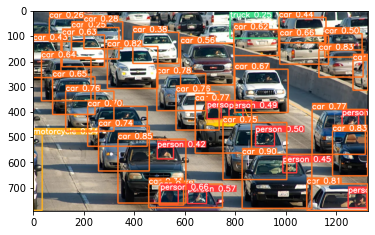

In [24]:
plt.imshow(np.squeeze(results.render()))

### Real-time Detections

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()